# Ensemble-Based Bankruptcy Risk Prediction

## Data Loading and Exploration


# Polish Companies Bankruptcy – Dataset Overview

This project uses the **Polish Companies Bankruptcy** dataset from the UCI Machine Learning Repository. It contains financial data from Polish enterprises along with information on whether a company went bankrupt within the following years. This is a practical and important real-world problem for financial institutions such as banks, investment funds, and insurance companies, which routinely build risk-assessment models based on such data.

The dataset includes **64 financial features** created by economists who originally prepared the collection. These features describe profitability, assets, liabilities, and other financial indicators.

## Data Setup

1. Download the `data.zip` archive from the *Data Folder* section on the UCI page.
2. Extract it into a `data` directory placed in your project folder.
3. Inside, you’ll find five `.arff` files, a format commonly used in the Weka machine-learning environment.


In [ ]:
# !unzip data/data.zip -d data

We will use the `3year.arff` file for the remainder of the project. It contains financial data collected over a 3-year monitoring period, and the task is to predict whether a company will go bankrupt within the next 3 years — a realistic forecasting horizon for financial risk analysis.

The `feature_names.json` file also includes full feature names. Since they are quite long, we will not use them for now.


In [ ]:
import json
import os

from scipy.io import arff
import pandas as pd

data = arff.loadarff(os.path.join("data", "3year.arff"))

with open("feature_names.json") as file:
    feature_names = json.load(file)

X = pd.DataFrame(data[0])

Let's look into our data.

In [ ]:
X.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [ ]:
X.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class      object
Length: 65, dtype: object

In [ ]:
X.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000


In [ ]:
feature_names

['net profit / total assets',
 'total liabilities / total assets',
 'working capital / total assets',
 'current assets / short-term liabilities',
 '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
 'retained earnings / total assets',
 'EBIT / total assets',
 'book value of equity / total liabilities',
 'sales / total assets',
 'equity / total assets',
 '(gross profit + extraordinary items + financial expenses) / total assets',
 'gross profit / short-term liabilities',
 '(gross profit + depreciation) / sales',
 '(gross profit + interest) / total assets',
 '(total liabilities * 365) / (gross profit + depreciation)',
 '(gross profit + depreciation) / total liabilities',
 'total assets / total liabilities',
 'gross profit / total assets',
 'gross profit / sales',
 '(inventory * 365) / sales',
 'sales (n) / sales (n-1)',
 'profit on operating activities / total assets',
 'net profit / sales',
 'gross profit (in 3 years) / 

The DataFrame contains 64 numerical attributes with varied value distributions, plus a `"class"` column stored as `bytes` that encodes the two target classes:  
- **0** — the company does *not* go bankrupt,  
- **1** — the company *does* go bankrupt within the next 3 years.  

Since this is a binary classification problem, let’s inspect the dataset more closely.

1. Extract the class labels into a separate `pd.Series`, remove the `"class"` column from `X`, and convert the labels to integers.  
2. Create a bar plot showing the frequency of both classes across the dataset.  
   - The X-axis should display the class labels.  
   - The Y-axis should show percentages.

In [ ]:
import numpy as np
#usuwam kolumnę class
y = X.pop('class')
#konwertuje na liczby całkowite
y = y.astype(int)

Text(0, 0.5, 'Klasy')

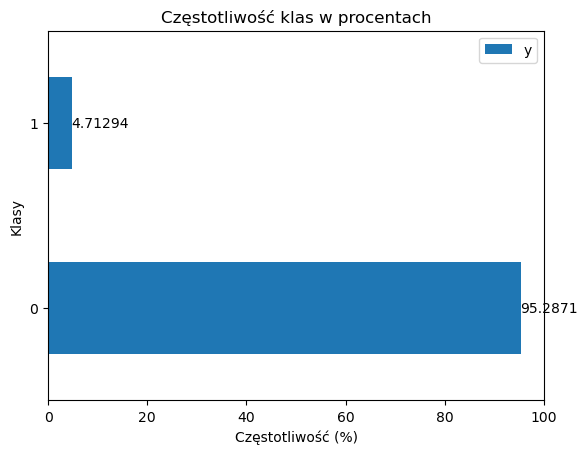

In [ ]:
#rysuję wykres słupkowy
#w procentach
class_counts = y.value_counts(normalize=True) * 100
df_freq = pd.DataFrame({'y': class_counts})
ax = df_freq.plot.barh()

ax.bar_label(ax.containers[0])

ax.set_title('Częstotliwość klas w procentach')
ax.set_xlabel('Częstotliwość (%)')
ax.set_ylabel('Klasy')

We’re working with a dataset that includes many numerical features. Before moving on, it’s worth checking whether any of them contain missing values—and if so, how many. While calculating these counts directly is possible, a visual inspection is usually more informative.

For this purpose, we can use the `missingno` library, which highlights missing entries in each column using a contrasting color, making patterns and sparsity easy to spot.

<Axes: >

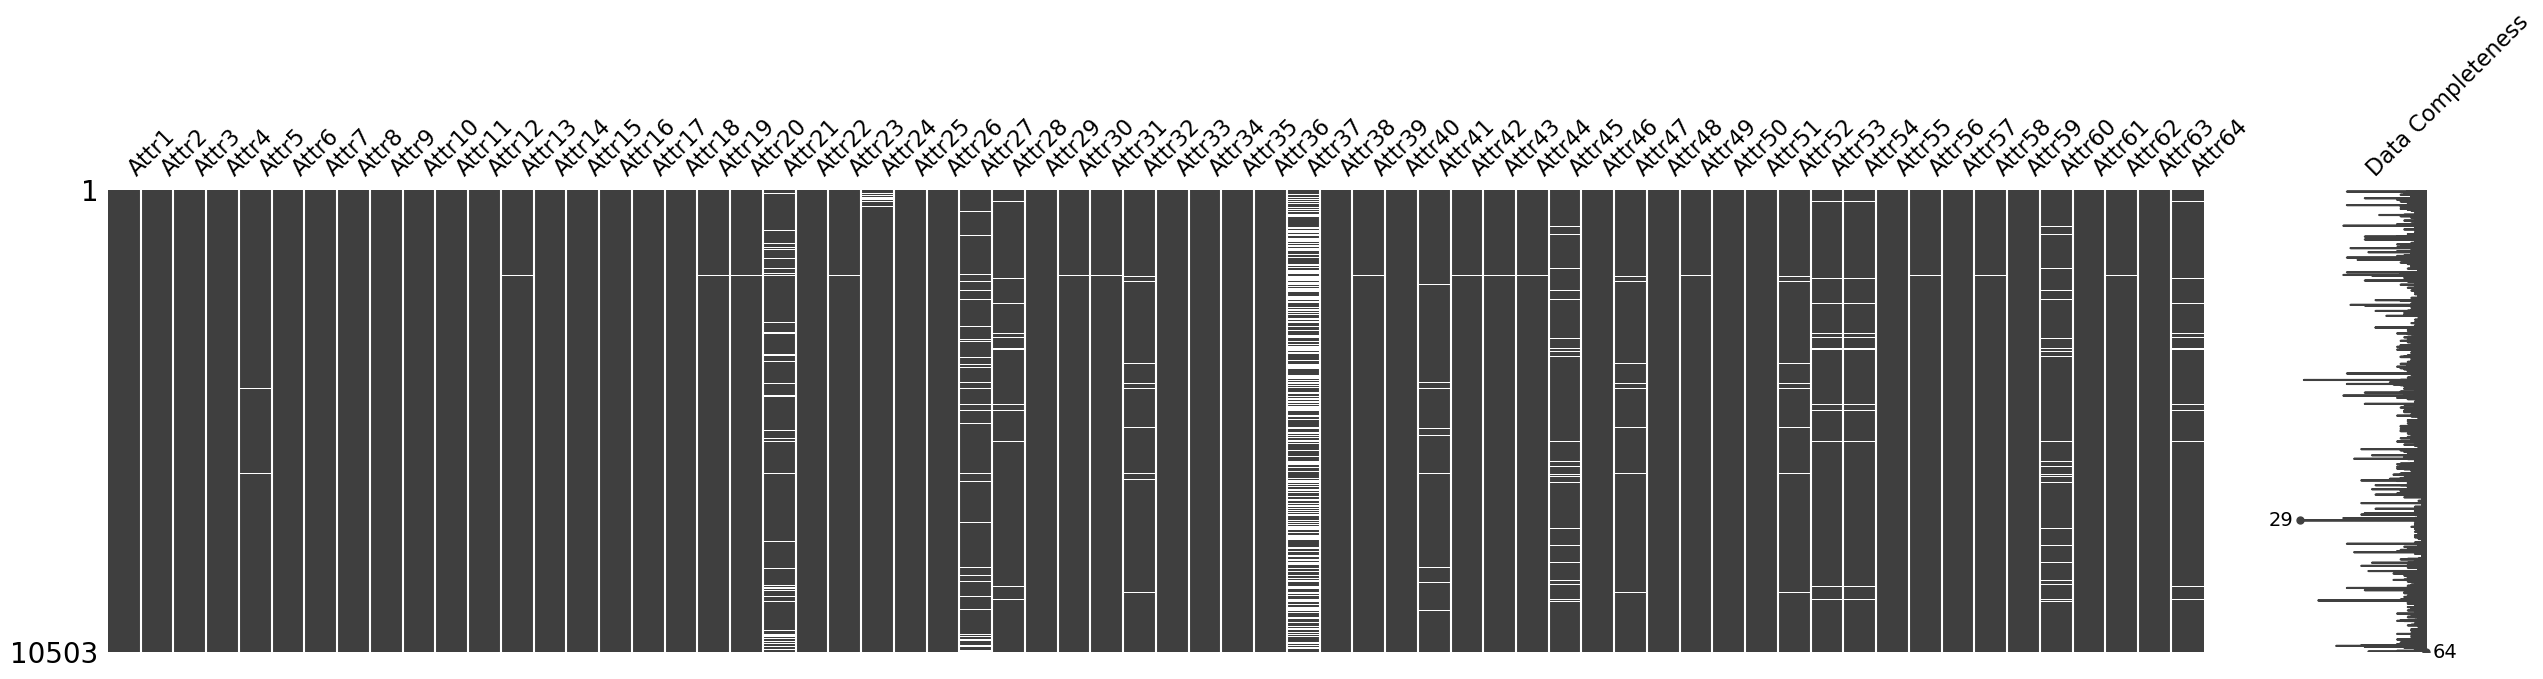

In [ ]:
import missingno as msno

msno.matrix(X, labels=True, figsize=(30, 6))

As we can see, feature 37 contains a very large number of missing values, while the remaining features have relatively few. In this situation, the best approach is to remove that feature entirely and **impute** the missing values in the remaining columns.

The train–test split is also the first point where class imbalance becomes a problem. If we split the data purely at random, there’s a significant chance that the test set will contain only the negative class — after all, it accounts for more than 95% of the data. To avoid this, we’ll use **stratified sampling**, which preserves class proportions both before and after splitting.

1. Remove the `"Attr37"` column from the dataset.  
2. Split the data into training and test sets in an 80%-20% ratio, with shuffling and stratification, using Scikit-learn’s `train_test_split`.  
3. Impute the missing values using the mean of each feature with `SimpleImputer`.


In [ ]:
# your_code
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#usuwam kolumne attr37
X.drop(["Attr37"], axis = 'columns')

#dziele zbior na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, shuffle = True, stratify = y, random_state = 0
)

#uzupelniam wartosci brakujace
median_imputer = SimpleImputer(strategy="median")
#tworze pipeline
pipeline_features = X.select_dtypes(exclude = "object").columns
pipeline = Pipeline([("imputer", median_imputer)])

#tworze column trans
column_transformer = ColumnTransformer(
    transformers=[('num',pipeline,pipeline_features)]
)


X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)




## Basic Classification


Before moving on to more advanced models, it’s important to establish a simple **baseline model** to use as a reference point.

For this task, the baseline will be a **decision tree classifier**. A decision tree is a binary structure built from if-else rules that ultimately classify each sample in one of the leaf nodes. Each split in the tree corresponds to a question like: *“Is feature X ≥ Y?”*. Training such a tree is a greedy algorithm, similar to constructing a regular binary tree. At each node, we perform:

1. Iterate over all possible split points — every unique value of every feature.  
2. For each split, divide the data into two subsets: those not meeting the condition (left child) and those meeting it (right child).  
3. Evaluate the split using a selected quality metric. The cleaner the separation (i.e., the more homogeneous the child nodes), the higher the quality. Ideally, one child contains mostly one class and the other child contains the other.  
4. Select the split with the best quality score.

This recursive process continues until reaching a **pure leaf**, a node containing samples from only one class. The most commonly used splitting criterion is Shannon entropy — lower entropy indicates more homogeneous class distribution, and the algorithm seeks the split that minimizes it.

<p align="center">
<img src="https://miro.medium.com/max/1838/1*WyTsLwcAXivFCgNtF0OPqA.png" width="642" height="451">
</p>

It’s important to note that this procedure naturally leads to **overfitting**. Achieving pure leaves means 100% accuracy on the training set, which corresponds to extremely low bias but very high variance. Even so, decision trees can perform surprisingly well, and various regularization techniques help prevent excessive tree growth.

In this sense, traditional ML here really is just a large set of nested if-else rules.  


Once the classifier is trained, we need to evaluate how well it performs. Here we run into another challenge typical for imbalanced classification — plain accuracy is useless in this setting. Instead, we’ll rely on **AUROC (Area Under the Receiver Operating Characteristic Curve)**, since this metric is sensitive to class imbalance and reflects ranking quality rather than raw accuracy.  

AUROC requires predicted **probabilities** for the positive class rather than hard binary outputs, so the model must provide probability estimates instead of only class labels.


1. Train a decision tree classifier (`DecisionTreeClassifier`) using entropy as the splitting criterion.  
2. Compute and print the AUROC on the test set using `roc_auc_score`.

In [ ]:
# your_code
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

#trenowanie drzewa dec.
clf = DecisionTreeClassifier(criterion='entropy', random_state = 0)
clf = clf.fit(X_train, y_train)

y_pred_clf = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_clf)

print("AUROC value: ", roc_auc)


AUROC value:  0.6567321567321568


The theoretical range of the AUROC metric is [0; 1], but since an AUROC value of 0.5 corresponds to random classification, the values of interest lie in the range [0.5; 1].  
The result we achieved falls within this range, and although it is relatively low, it appears to be reasonable.

## Ensemble Learning, Bagging, Random Forests


Ensemble learning often leads to better results than using a single classifier. This approach, known as **ensemble learning**, combines multiple classifiers to improve performance. There are many ways to construct ensemble classifiers.

The basic method is **bagging**:

1. Draw N (e.g., 100, 500, ...) bootstrap samples from the training set. A bootstrap sample is simply sampling **with replacement**, so for a dataset with M rows, we randomly sample M times. Some rows will repeat, typically about one-third, but this is expected.  
2. Train a **base classifier** on each bootstrap sample.  
3. Create the ensemble classifier by averaging the predictions of all base classifiers.

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/440px-Ensemble_Bagging.svg.png" width="440" height="248">
</p>

Base classifiers are usually kept simple so that many of them can be trained quickly. Decision trees are almost always used. For classification, averaging predictions corresponds to **voting**: each base classifier predicts a class for a new sample, votes are summed, and the most popular class is returned.

Bagging reduces classifier variance. Intuitively, averaging predictions makes extreme results less likely, which also helps mitigate overfitting.

**Random Forests** improve upon bagging. It was observed that even with bootstrap sampling, individual trees can be very similar (highly correlated), often using the same features for splits. To increase diversity (and keep bias low), the **random subspace method** is used: at each split, only a random subset of features is considered. Typically, this subset is the square root of the total number of features.

Both bagging and random forests have another advantage: they are relatively insensitive to hyperparameters, especially the number of trees. In practice, setting 500 or 1000 trees usually works well. Further tuning can slightly improve results but not as dramatically as with other classifiers. This makes them an excellent default choice when the optimal classifier is unknown.

Additionally, this problem is **embarrassingly parallel** — each tree can be trained completely independently, making the method computationally efficient.

---

### Exercise

1. Train a **Random Forest classifier** (`RandomForestClassifier`) with 500 trees and entropy as the splitting criterion.  
2. Evaluate the AUROC on the test set.  
3. Compare the result to the single decision tree and comment on the improvement.


In [ ]:
# your_code
from sklearn.ensemble import RandomForestClassifier

#trenowanie lasu los.
rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', n_jobs = -1, random_state = 0)
rf = rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_rf)

print("AUROC value: ", roc_auc)


AUROC value:  0.8753695799150345


Using Random Forests significantly increased the AUROC compared to the single decision tree — ensemble learning works.


As we will see below, this result can still be improved!


## Oversampling, SMOTE

For imbalanced datasets, we can perform **balancing** using one of two approaches:  
- **Undersampling**: remove samples from the majority class.  
- **Oversampling**: generate additional samples for the minority class.

Undersampling works well when imbalance is mild and the dataset is large (so we can afford to remove some samples). Oversampling typically yields better results and has efficient algorithms available. In cases of extreme imbalance, both methods can be combined.

A common oversampling technique is **SMOTE (Synthetic Minority Oversampling Technique)**. It works as follows:  
1. Iterate over each sample from the minority class.  
2. Find the `k` nearest neighbors of that sample (typically `k=5`).  
3. Randomly select the number of neighbors needed for oversampling. For example, to triple the size of the minority class (increase by 200%), select 2 out of 5 neighbors.  
4. For each selected neighbor, generate a new point along the line connecting the original sample and the neighbor. Add this point as a new sample.

<p align="center">
<img src="https://miro.medium.com/max/734/1*yRumRhn89acByodBz0H7oA.png">
</p>

This technique produces samples similar to real ones, preserving the distribution while helping classifiers by "densifying" the region occupied by the positive class.

---

Use **SMOTE** to balance the training set (do **not** apply it to the test set!) using the `SMOTE` class. Train a decision tree and a random forest on the balanced training set, using the same parameters as before.


In [ ]:
from imblearn.over_sampling import SMOTE

#balansowanie zbioru treningowego uzywajac SMOTE
sm = SMOTE(random_state=0, n_jobs = -1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

#trenowanie drzewa dec.
clf = DecisionTreeClassifier(criterion='entropy', random_state = 0)
clf = clf.fit(X_train_sm, y_train_sm)
y_pred_clf = clf.predict_proba(X_test)[:,1]

#trenowanie lasu los.
rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', n_jobs = -1, random_state = 0)
rf = rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict_proba(X_test)[:,1]


roc_auc_clf = roc_auc_score(y_test,y_pred_clf)
print("AUROC value for Decision Tree: ", roc_auc_clf)
print()
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUROC value for Random Forest: ", roc_auc_rf)




C:\Users\anton\anaconda3\envs\psi\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


AUROC value for Decision Tree:  0.6785159285159285

AUROC value for Random Forest:  0.86358843177025


The AUROC increased slightly for the decision tree and decreased slightly for the random forest.  

For the remainder of the lab, we wil use the training set after applying SMOTE when training classifiers.


## Hyperparameter Tuning


Random forests are relatively insensitive to hyperparameter tuning — which is good, because they have quite a few parameters. However, tuning can still help, particularly the `max_features` parameter, which determines how many features to consider at each split.

1. Tune the `max_features` hyperparameter:
   - Use a **grid search** with 5 folds.  
   - Test the values `[0.1, 0.2, 0.3, 0.4, 0.5]`.  
   - Select the model with the highest AUROC (`scoring` argument).  
2. Check which value of `max_features` was optimal. This can be accessed as an attribute of the fitted `GridSearchCV` object.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5]
}

#tworzenie lasu los.
rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', n_jobs = -1, random_state = 0)

#dostrajanie
grid_search = GridSearchCV(estimator = rf ,cv = 5, param_grid = params, n_jobs = -1, scoring='roc_auc' , verbose = 2)
grid_search.fit(X_train_sm, y_train_sm)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=500, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1, param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='roc_auc', verbose=2)

In [ ]:
best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict_proba(X_test)[:,1]

print("AUROC of Random Forest Classifier after tuning: ", roc_auc_score(y_test, y_pred_tuned))

{'max_features': 0.2}
AUROC of Random Forest Classifier after tuning:  0.8671051171051171


The difference in AUROC is almost negligible, so the tuning was not really worth it.


**Random Forest – Summary**

1. Ensemble-based model.  
2. Key components:  
   - **Bagging**: training multiple classifiers on bootstrap samples.  
   - **Random subspace method**: randomly select a subset of features for each tree split.  
   - Aggregate predictions by averaging (voting) across classifiers.  
3. Relatively resistant to overfitting; reduces variance through averaging.  
4. Not very sensitive to hyperparameters.  
5. Typically delivers very strong results, making it an excellent default choice for classification tasks.


## Boosting

Another very important group of ensemble algorithms is **boosting**, which also uses decision trees. Unlike Random Forest, which trains all base classifiers in parallel and averages their predictions, boosting trains trees **sequentially**. Each tree is trained on the full dataset, not bootstrap samples. The idea is as follows:  

- Train a decision tree; it performs reasonably well but makes mistakes on some training samples.  
- Add another tree that learns from the errors of the previous one, correcting them.  
- Continue adding trees in the same manner, each "boosting" the model using the knowledge of its predecessor.

How does a tree learn from its predecessor’s mistakes? This is done via a **cost function** (or loss function) that we aim to minimize. We choose an appropriate form for the problem — e.g., squared error for regression or logistic loss for classification. Gradient descent is then used to determine the direction in which each new tree should optimize to reduce the previous errors. This approach is known as **gradient boosting**, the most popular form of boosting and one of the most effective and widely used machine learning algorithms.

1. Train a **LightGBM classifier** (`LGBMClassifier`) with `importance_type="gain"` — we will use this later.  
2. Evaluate AUROC on the test set.


In [ ]:
# your_code
from lightgbm import LGBMClassifier

#trenowanie light gradient boosting machine
lgbm_clf = LGBMClassifier(importance_type="gain", random_state = 0, n_jobs = -1)
lgbm_clf = lgbm_clf.fit(X_train_sm,y_train_sm)

#przewidywane wartosci
y_pred_lg = lgbm_clf.predict_proba(X_test)[:,1]

print("AUROC: ", roc_auc_score(y_test,y_pred_lg))


[LightGBM] [Info] Number of positive: 8006, number of negative: 8006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 16012, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
AUROC:  0.9141111413838687


The AUROC value is higher than all previous models.

Boosting reduces not only variance but also bias by learning from previous trees, which often allows it to outperform a random forest. Additionally, LightGBM is highly optimized and runs faster.

However, boosting is much more sensitive to hyperparameters than Random Forest. It is easy to overfit, and most hyperparameters — of which there are many — are related to regularization. Achieving good results with default parameters, as we did, is actually rare.

Since the hyperparameter space is large, exhaustive search is impractical. Instead, we can sample a fixed number of hyperparameter combinations and evaluate only those — the more samples, the better the expected results. This is the purpose of `RandomizedSearchCV`. Moreover, this class can sample from probability distributions, not just fixed lists, which is useful for continuous parameters.

1. Implement a **random search** for LightGBM (`RandomizedSearchCV`):  
   - Use as many trials as your computational resources allow, but at least 30.  
   - Search over the following hyperparameter space:
    ```
    param_grid = {
        "n_estimators": [400, 500, 600],
        "learning_rate": [0.05, 0.1, 0.2],
        "num_leaves": [31, 48, 64],
        "colsample_bytree": [0.8, 0.9, 1.0],
        "subsample": [0.8, 0.9, 1.0],
    }
    ```
2. Print the optimal hyperparameters found.  
3. Print classification reports (`classification_report`) for LightGBM **before** and **after** hyperparameter tuning.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid = {
    "n_estimators": [400, 500, 600],
    "learning_rate": [0.05, 0.1, 0.2],
    "num_leaves": [31, 48, 64],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "subsample": [0.8, 0.9, 1.0],
}

#tuning hiperparametrow z uzyciech random search
rand_search = RandomizedSearchCV(
    estimator = lgbm_clf,
    param_distributions = param_grid,
    n_iter = 10,
    scoring='roc_auc',
    n_jobs = -1,
    cv =  5,
    verbose = 1,
    random_state = 0
)

rand_search.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 8006, number of negative: 8006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 16012, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(importance_type='gain', n_jobs=-1,
                                            random_state=0),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'n_estimators': [400, 500, 600],
                                        'num_leaves': [31, 48, 64],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=0, scoring='roc_auc', verbose=1)

In [ ]:
print("Najlepsze hiperparametry: " , rand_search.best_params_)
lgbm_clf_tuned = rand_search.best_estimator_

Najlepsze hiperparametry:  {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 600, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [ ]:
from sklearn.metrics import classification_report

print("Without tuning")
print(classification_report(y_test, lgbm_clf.predict(X_test)))

print("With tuning")
print(classification_report(y_test, lgbm_clf_tuned.predict(X_test)))

Without tuning
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2002
           1       0.53      0.49      0.51        99

    accuracy                           0.96      2101
   macro avg       0.75      0.74      0.74      2101
weighted avg       0.95      0.96      0.95      2101

With tuning
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2002
           1       0.82      0.42      0.56        99

    accuracy                           0.97      2101
   macro avg       0.90      0.71      0.77      2101
weighted avg       0.97      0.97      0.96      2101



Sensitivity for class 0 increased after tuning, while for class 1 it decreased. Precision for class 0 decreased, whereas for class 1 it increased significantly. Overall, these changes resulted in a slight improvement in the F1-score after tuning.


**Boosting – Summary**

1. Ensemble-based model.  
2. Models are added sequentially and learn from the errors of their predecessors.  
3. Training is typically based on minimizing a cost (loss) function using gradient descent.  
4. Leading approach for tabular data classification, with two main implementations: XGBoost and LightGBM.  
5. Numerous hyperparameters requiring careful tuning.
